<p>
<font size='5' face='Georgia, Arial'>IIC2115 - Programación como herramienta para la ingeniería</font><br>
</p>

# Sistemas de información geográfica

Un Sistema de Información Geográfica (SIG o GIS por sus siglas en inglés) es una integración organizada de hardware, software y datos geográficos diseñada para capturar, almacenar, manipular, analizar y desplegar en todas sus formas la información geográficamente referenciada con el fin de resolver problemas complejos de planificación y gestión.

## Funcionamiento de GIS

El GIS funciona como una base de datos con información geográfica (datos alfanuméricos) que se encuentra asociada por un identificador común a los objetos gráficos de un mapa digital. De esta forma, señalando un objeto, se conocen sus atributos e, inversamente, preguntando por un registro de la base de datos se puede saber su localización en la cartografía.

La razón fundamental para utilizar un GIS es la gestión de información espacial. El sistema permite separar la información en diferentes capas temáticas y las almacena independientemente, permitiendo trabajar con ellas de manera rápida y sencilla, y facilitando al profesional la posibilidad de relacionar la información existente a través de la topología de los objetos, con el fin de generar otra nueva que no podríamos obtener de otra forma.

### La representación de los datos

Los datos GIS representan los objetos del mundo real en un sistema referenciado de coordenadas. Para los alcances del curso es necesario entender que uno de los formatos más utilizados para almacenar esta información es el formato Shape (shp).

Formalmente un shp es conocido como ESRI Shapefile, formato creado por la compañia ESRI y actualmente se ha convertido en formato estándar para el intercambio de información geográfica entre Sistemas de Información Geográfica. 

El formato shp, a diferencia de la mayoria de formatos, no se compone de un único archivo, sino que esta formato por una serie de formatos que facilitan el traspaso de información. En este capítulo revisaremos los formatos escenciales para el trabajo con GIS, siempre usted podrá complementar la información con la documentación oficial de ESRI Shapefile.

### Formato SHP

El formato shp (shape) busca representar información geográfica, por ejemplo, Geometrías de países, comunas, áreas verdes, ciclovias, vialidad, rios, etc. Para representar alguna de estas geometrías, se utiliza una seríe de archivos, donde cada uno de estos almacena información diferente. Es importante que cada unos de los archivo que se definen acontinuación estén ubicados en la misma carpeta y se llamen exactamente igual (a diferencia de la extensión).

#### a) Archivo SHP

Este es el archivo principal del formato SHP, en él se almacenan todas las geometrías de lo que estamos trabajando. Por ejemplo, si hablamos de países, nos referimos a los polígonos que forman cada país, o si hablamos de vialidad nos refereimos a la lineas que la conforman. En total existen tres tipos de geometrías que admite el formato SHP:

- Puntos
- Líneas
- Polígonos

![](Data/geometries.png)

Un archivo SHP admite solo un tipo de geometría a la vez, por lo que por ejemplo, si quisiéramos trabajar con información de rios (líneas) y áreas verdes (geometrías), debemos tener cada grupo de geometrías en un archivo shp diferente. Es decir, un archivo `rios.shp` con las geometrías de líneas y otro `areas_verdes.shp` con las geometrías de polígonos. Pueden trabajarse ambos archivos en conjunto en un proyecto, lo que veremos más adelante. 

Toda figura (punto, línea o polígono) esta definida por coordenadas. Por ejemplo, los shape de puntos corresponden a una única coordenada por punto, los shapes de líneas a una secuencia de coordenadas por objeto y los shape de polígonos a una secuencia de coordenadas donde la primera es igual a la última, para definir un polígono. 

#### b) Archivo DBF

El archivo DBF corresponde a la base de datos asociada a las geometrías presentes en el archivo DBF, también se conocen como los Metadatos. En esta base de datos se almacena toda la información que no esta relacionada con la geometría misma, sino que información asociada, tales como nombres, cantidades, o cualquier otra información. Cuando trabajemos con Python, verán que la información contenida en el archivo DBF se puede alamcenar dentro de un DataFrame de pandas, lo que simplifica el uso.

#### c) Archivo SHX

El archivo SHX es un archivo interno del formato SHP que almacena los indices de las geometrías y su relación con los metadatos (contenidos en el archivo DBF). Su presencia es necesaria si es que existe un archivo de dato, de lo contrario no sería posible determinar de qué geometría son los datos del DBF.

#### d) Archivo PRJ

El archivo PRJ alamcena la proyección utilizada en el archivo SHP para describir las geometrías. Cualquier geometría dispuesta en la superficie de la tierra debe definirse por medio de coordenadas. Estas coordenadas puede estar especificada utilizando distintos formatos. Por ejemplo, GoogleMaps utiliza el formato **EPSG:4326** que hace referencia a las conocidas coordenadas basadas en grados de Latitud y Longitud. Cuando trabajamos a nivel de ciudades, se recomienda el uso de coordenadas UTM que disminuyen los errores para determinadas zonas del mundo y las distancias entre coordenadas estan en metros. En el caso de Santiado, Chile por ejemplo, se usa **EPSG:32719**. Si este archivo no se encuentra disponible, entonces uno deberá indicar manualmente qué sistema se utiliza basado en las coordenadas presentes en el SHP.

## Instalación de Geopandas

El manejo de este tipo de información por medio de Python se lleva a cabo mediante la librería GeoPandas. Una librería basada en el trabajo con DataFrames (como en Pandas), pero que esta vez se incluirá una columna geográfica para representar: Puntos, Líneas o Polígonos. Recordemos que un DataFrame (o shapefile) debe contar solo con un tipo de información. Por lo que si buscamos representar más de un tipo de datos, debemos crear un DataFrame por cada forma geográfica.

### a) Instalación con Colab

Para utilizar la librería en Colab, basta con ejecutar las siguientes instrucción en la primera celda del notebook:

```bash
# Necesarias para manejo de índices
!pip install rtree -q
!pip install pygeos -q

!pip install -geopandas
```

Una vez finalizado el proceso, podrán utilizar sin problemas la librería. Es importante notar que la instrucción anterior, dado que corresponde a la instalación de la librería, solo es necesario ejecutarla cuando se abre inicialmente el notebook en Colab.

**SE RECOMIENDA FUERTEMENTE UTILIZAR ESTE ESQUEMA POR SOBRE LOS SIGUIENTES PARA TRABAJAR EN GEOPANDAS** 

### b) Instalación con Anaconda

Si cuentan con Anaconda instalado, para instalar geopandas basta que ejecuten:

```bash
conda install -c conda-forge geopandas
```

Luego instalen la librería `Descartes` por medio de Anaconda.

### c) Instalación en Windows (**Video explicativo - minuto 39:** [Link Video](https://youtu.be/TbJSV5Mp9hk?t=2351))

El proceso de instalación de GeoPandas puede volverse complejo si no se siguen correctamente los pasos para llevar a cabo la instalación. Su instalación se llevará acabo mediante el uso de `pip` pero antes habiendo instalado todas sus dependencias. Varias de sus dependencias pueden ser instaladas mediante `pip` pero otras deben ser instaladas manualmente:

- numpy: `pip install numpy`
- matplotlib: `pip install matplotlib`
- pandas: `pip install pandas`
- gdal: Debe ser instalado de forma manual$^*$
- fiona: Debe ser instalado de forma manual$^*$
- pyproj: Debe ser instalado de forma manual$^*$
- shapely: Debe ser instalado de forma manual$^*$
- rtree: Debe ser instalado de forma manual$^*$

Una vez que todas las dependencias se encuentren instaladas, entonces recién se puede instalar geopandas mediante el comando: `pip install geopandas`. Posterior a la instalación de geopandas, es bueno instalar una librería que ayuda a las visualizaciones llamada Descartes, mediante el comando: `pip install descartes`

$^*$: Para la instalación manual de librerías deben acceder a este [link](https://www.lfd.uci.edu/~gohlke/pythonlibs/), buscar el nombre de la librería y descargarla para la versión de python y arquitectura que este utilizando. Una vez descargado el archivo, basta que ejecuten `pip install archivo_descragado` (vean el detalle en el video).

### d) Instalación en Mac (**Video explicativo - minuto 37:** [Link Video](https://youtu.be/TbJSV5Mp9hk?t=2226))

El proceso de instalación de GeoPandas en Mac suele ser bastante más sencillo que en Windows. En este caso, no es necesario instalar las dependencias a mano. Basta que ejecutemos las siguientes instalaciones:

- numpy: `pip3 install numpy`
- matplotlib: `pip3 install matplotlib`
- pandas: `pip3 install pandas`
- geopandas: `pip3 install geopandas`

Una vez que todas las dependencias se encuentren instaladas, entonces recién se puede instalar geopandas mediante el comando: `pip3 install geopandas`. Posterior a la instalación de geopandas en Mac, debemos instalar 3 librerías: spatialindex, rtree y descartes:

- spatialindex: `brew install spatialindex` (Deben tener el homebrew instalado, vean el video que subimos al principio del curso [link](https://youtu.be/FxHoi_ZRV4s?t=658)
- rtree: `pip3 install rtree`
- descartes: `pip3 install descartes`

## Uso básico de GeoPandas

In [ ]:
!pip install rtree -q
!pip install pygeos -q

!pip install -geopandas

### a) Lectura de archivos (.shp)
Lo primero que debemos hacer para trabajar con archivo geográficos es importar la librería de geopandas y luego leer un archivo .shp. Para eso utilizaremos la siguiente función.

In [1]:
import geopandas as gpd

distritos = gpd.read_file('Data/Parte 1/Distritos Censales/Distritos Censales RM.shp')
lineas_metro = gpd.read_file('Data/Parte 1/Metro 2020/Lineas_2020/Lineas_2020.shp')

En las dos líneas anteriores hemos leído dos archivos shp diferentes. Uno de polígonos con los distritos censales de Santiago y otro de líneas con las líneas de Metro. Notar que el archivo que abrimos es el shp. Geopandas se encarga de incluir el resto de archivos GIS. 

A diferecia de pandas que trabaja con DataFrames, geopandas trabaja con GeoDataFrames. Esta nueva estructura de datos es básicamente un DataFrame, pero incluye una columna con componente geográfica. Podemos usar el método `head()` para visualizar una porción del GeoDataFrame.

In [2]:
distritos.head(2)

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6..."
1,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Moneda,1310102.0,51.0,560.0,999.0,903.0,228.0,2741.0,1166659.89,23.49,21.10,"POLYGON ((345880.280 6299633.958, 345961.610 6..."


In [3]:
lineas_metro.head(2)

,OBJECTID,ID_LINEA,LINEA,LENGTH,Shape_Leng,Shape_Le_1,geometry
0,3,2,L2,18315.942,20087.016072,1301.975352,"LINESTRING (-70.66142 -33.52651, -70.66325 -33..."
1,4,2,L2,18315.942,20087.016072,1057.384032,"LINESTRING (-70.65881 -33.51723, -70.66138 -33..."


Podemos notar que los GeoDataFrame son idénticos a los DataFrame de pandas, de hecho, todos los métodos que tenemos disponibles para los DataFrames de pandas están disponibles para los GeoDataFrame. La diferencia recae en que los GeoDataFrame incluyen una seríe de nuevo métodos que permiten interactuar con la columna geográfica.

En la columna **geometry** de los GeoDataFrame (siempre se creará por defecto) encontramos las geometrías que poseen cada uno de los registros del archivo SHP. La columna geometry solo puede almacenar una única geometría. Por ejemplo, en la visualización de los distritos vemos que geometry es un **POLYGON**, mientras que en lineas_metro es un **LINESTRING**.

Como mencionámos anteriormente, GIS solo soporta tres tipos de geometrias: Puntos, Líneas y Polígonos. En geopandas, estas figuras son representadas por una librería llamada **Shapely** (dependecia de geopandas). En ella, encontramos los objetos POINT, LINESTRING y POLYGON para referirse a los Puntos, Líneas y Polígonos respectivamente. Por lo tanto, la columna geometry de los GeoDataFrames corresponde a alguno de estos tres objetos de la librería Shapely. Eso lo podemos comprobar con el método `type()` de python.

In [4]:
type(distritos['geometry'][0])

shapely.geometry.polygon.Polygon

In [5]:
type(lineas_metro['geometry'][0])

shapely.geometry.linestring.LineString

### b) Visualización de GeoDataFrames

Dado que los GeoDataFrames incluyen una componente geográfica, estos pueden visualizarse. Para ello, haremos uso del método `plot()`

<AxesSubplot:>

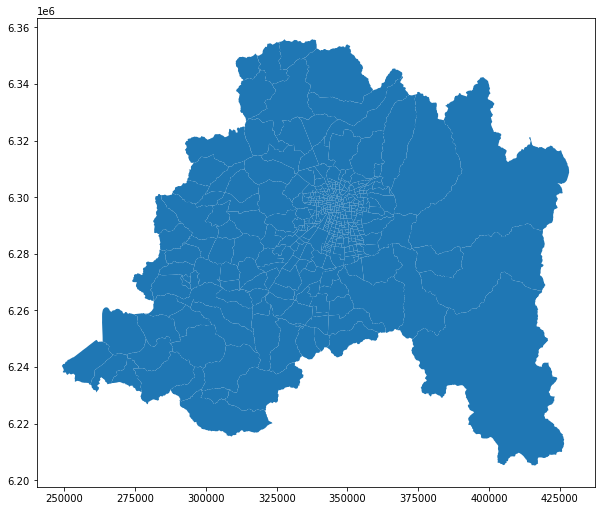

In [6]:
distritos.plot(figsize = (10,10))

<AxesSubplot:>

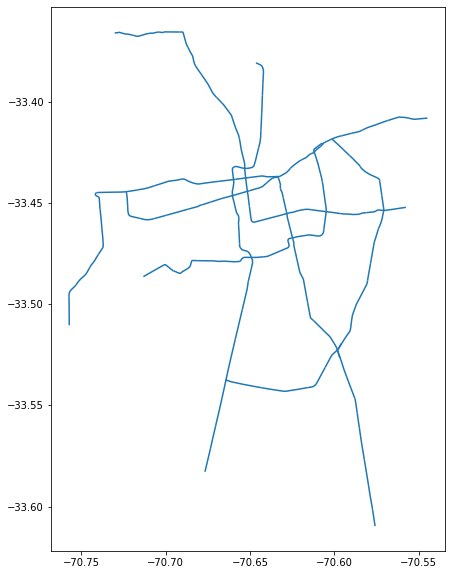

In [7]:
lineas_metro.plot(figsize = (10,10))

Muchas veces nos gustaría visualizar estos archivos de forma conjunta, eso también es posible mediante la librería de geopandas. Para eso, podemos utilizar las líneas de acontinuación. 

<AxesSubplot:>

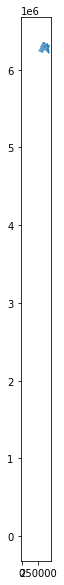

In [8]:
# Guardamos nuestro primer gráfico en una variable
ax = distritos.plot(figsize = (10,10))

# Usamos esa variable (que es un axes) y construímos el segundo gráfico con el anterior como base
# Es importante que le cambiemos el color para que se puedan visualizar sin problemas.
lineas_metro.plot(ax = ax, figsize = (10,10), color = 'red')

**¿Qué pasó?** Lo que pasa, es que como comentamos anteriormente, cuando uno almacena un archivo de GIS, este utiliza cierta "lógica" para convertir las coordenadas que están en la esfera de la tierra al plano. Estas lógicas se llaman proyecciónes y son las que se almacenan en el archivo PRJ. Por tanto, si queremos visualizar estas geometrías en conjunto debemos dejar ambos archivos en la misma proyección.

#### Proyecciones

Las proyecciones se utilizan para codificar las coordenadas de la tierra al plano. Existen varios formatos para almacenar esta información. Si observan el órden de magnitud de la coordenadas presentes dentro de los objetos de la columna geometry verán que para las líneas de metro tenemos número del órden -33, -70 (Coordenadas Lat Long - las que usa GoogleMaps) y en los distritos se manejan otro tipo de números (Coordenadas UTM). Esa es la razón por la que la visualización conjunta no funcionó. Para conocer las proyecciónes de cada archivo podemos hacer lo siguiente:

In [9]:
distritos.crs

<Projected CRS: EPSG:32719>
Name: WGS 84 / UTM zone 19S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°W and 66°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Chile. Colombia. Peru.
- bounds: (-72.0, -80.0, -66.0, 0.0)
Coordinate Operation:
- name: UTM zone 19S
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
lineas_metro.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Lo que nos interesa de estas líneas, es el código junto a **EPSG** en la primera línea. Este es el código de la proyección utilizada. Podemos notar que el archivo de distritos posee un EPSG 32719 mientras que el de las líneas de metro es EPSG 4326. 

El EPSG 32719 (Coordenadas UTM) es ampliamente utilizado en Chile por su bajo nivel de error al proyectar las coordenadas de la tierra al plano. La gran ventaja de este sistema de coordenadas es que las distancias entre dos puntos cualesquiera es en metro, lo que facilita el trabajo. 

El EPSG 4326 es un sistema universal basado en grados, es decir, se mide en grados de latitud y grados de longitud. Es ampliamente utilizado a nivel mundial, pero es importante mencionar que las distancias esta en grados por lo que es una medida que facilite el trabajo en mapas.

Por eso, vamos a convertir las líneas de metro en EPSG 32719 y lo vamos a guardar en un nuevo GeoDataFrame.

In [11]:
lineas_metro_utm = lineas_metro.to_crs(32719)

Ahora que hemos resuleto el problema de proyecciones, probemos a ver si es posible visualizarlos en conjunto:

<AxesSubplot:>

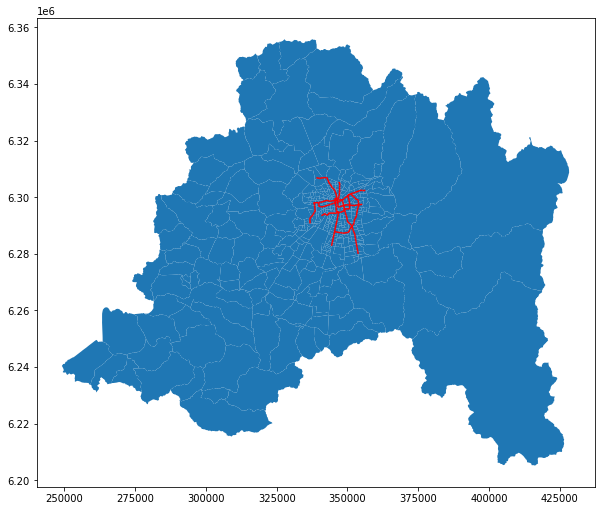

In [12]:
# Guardamos nuestro primer gráfico en una variable
ax = distritos.plot(figsize = (10,10))

# Usamos esa variable (que es un axes) y construímos el segundo gráfico con el anterior como base
# Es importante que le cambiemos el color para que se puedan visualizar sin problemas.
lineas_metro_utm.plot(ax = ax, figsize = (10,10), color = 'red')

Esta vez funcionó perfectamente.

### c) Visualización específa de datos

En ocaciones, lo que buscamos es utilizar la información asociada a las geometrías para realizar filtros, transformaciones, etc. Si lo que buscamos es visualizar una columna en especifico.

In [13]:
distritos.head(1)

,NOM_REG,COD_PROV,NOM_PROV,COD_COM,NOM_COM,NOM_DIS,CODIGO,E,D,C3,C2,ABC1,ADIMARK_T,Area,Densidad,1_UF_M2,geometry
0,Región Metropolitana De Santiago,131,Santiago,13101,Santiago,Huelén,1310101.0,28.0,397.0,1232.0,1390.0,365.0,3412.0,704315.75,48.44,31.09,"POLYGON ((346775.511 6299463.724, 346788.392 6..."


Por ejemplo, en el DataFrame de distritos vemos varias columnas de información. Los datos provienen de la encuesta Adimark en base a los datos del Censo. 
    
- NOM_REG: Nombre de la región
- COD_PROV: Código de la provincia
- NOM_PROV: Nombre de la provincia
- COD_COM: Código de la comuna
- NOM_COM: Nombre de la comuna
- NOM_DIS: Nombre del distrito censal
- CODIGO: Código del del distrito censal	
- E: Número de hogares clase E por distrito censal	
- D: Número de hogares clase D por distrito censal	
- C3: Número de hogares clase C3 por distrito censal	
- C2: Número de hogares clase C2 por distrito censal	
- ABC1: Número de hogares clase ABC1 por distrito censal		
- ADIMARK_T: Total de hogares
- Area: Area del distrito
- Densidad: Densidad poblacional del distrito
- 1_UF_M2: Valor del metro cuadrado en UF

Pensemos que quisiéramos visualizar las áreas por distrito y que estas se coloreen en base a esto.

<AxesSubplot:>

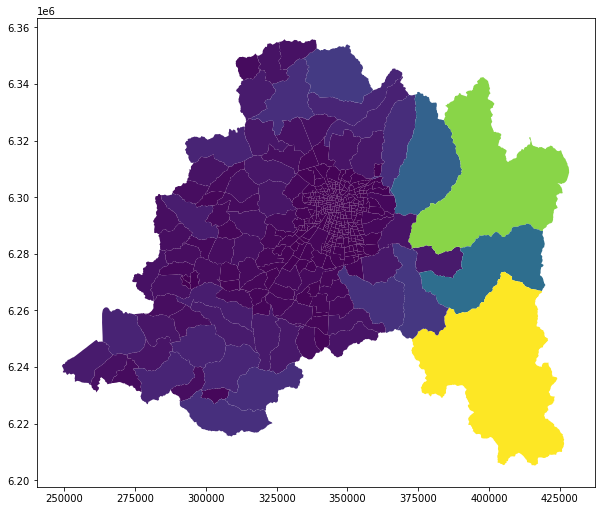

In [14]:
distritos.plot(column = 'Area', figsize = (10,10))

O el valor del metro cuadrado por distrito:

<AxesSubplot:>

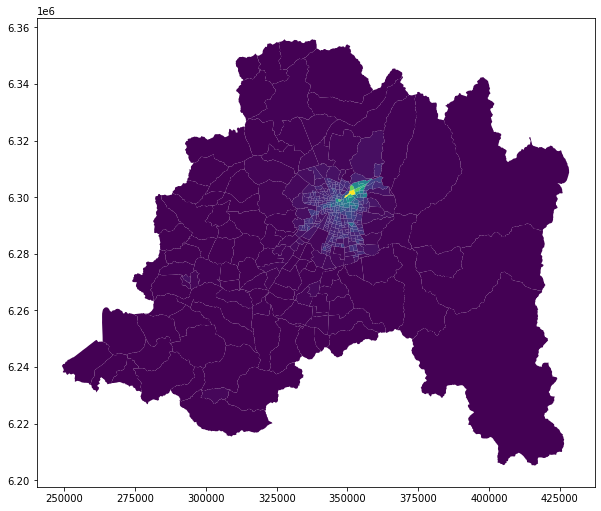

In [15]:
distritos.plot(column = '1_UF_M2', figsize = (10,10))

### d) Filtrado y procesamiento geográfico

En la visualización anterior mostramos el valor del $m^2$. Lamentablemente, este valor, se encuentra mejor contenido dentro de la zona urbana de Santiago de la RM. Por tanto, debemos buscar la forma de filtrar o cortar la región para centrarnos en la zona donde se almacena la información. Una forma sencilla, es hacer uso de la función `loc[]` de pandas para visualizar solo los distritos que estén sobre cierto valor:

<AxesSubplot:>

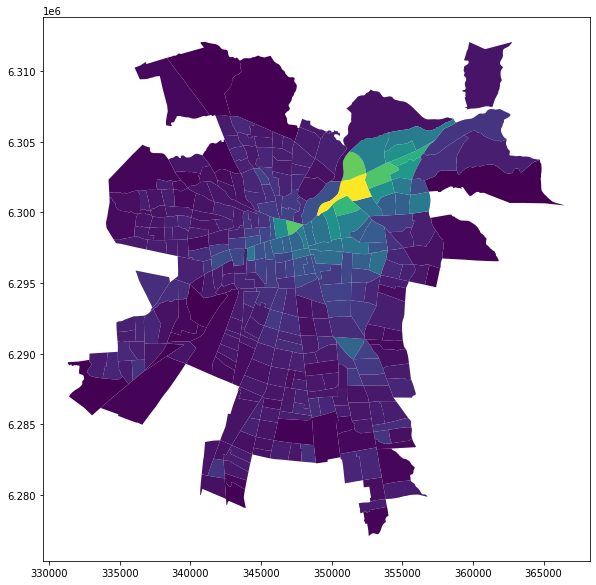

In [16]:
# Realizamos un filtro de los datos
distritos_UF_mayor = distritos.loc[distritos['1_UF_M2']>1.8]

# Visualizamos este nuevo filtro
distritos_UF_mayor.plot(column = '1_UF_M2', figsize = (10,10))

Logramos hacer un "zoom" a la zona urbana de Santiago basado en los datos de los valores del suelo. Pero esto no siempre es posible, por lo que la forma correcta de hacerlo es construir otro Shape que solo contenga la geometría de la zona urbana de Santiago y realizar una intersección. Dentro de la carpeta Data, tenemos un shape que corresponde a solo las áreas urbanas de Chile.

<AxesSubplot:>

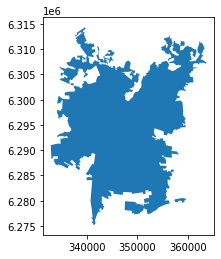

In [17]:
# Cargamos el shape de areas urbanas de chile
chile_urbano = gpd.read_file('Data/Parte 1/Areas Urbanas/areas_urbanas.shp')

# Filtramos solo el de Santiago y visualizamos
santiago_urbano = chile_urbano.loc[chile_urbano['NOMBRE']=='Santiago']
santiago_urbano.plot()

Ahora, podemos intersectar nuestro dataframe de distritos con la zona urbana y volver a visualizar. GeoPandas incluye dos metodologías de intersección, puede consultarlas en los siguientes enlances:

- Operaciones con **Overlay** ([Link](https://geopandas.org/set_operations.html))
- Operaciones con **sjoin** ([Link](https://geopandas.org/mergingdata.html))

En este caso realizaremos la intersección con overlay.

<AxesSubplot:>

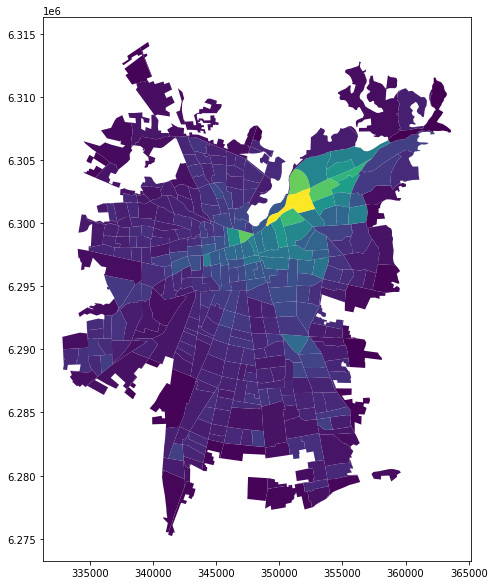

In [18]:
distritos_urbano = gpd.overlay(distritos, santiago_urbano, how='intersection')
distritos_urbano.plot(figsize = (10,10), column = '1_UF_M2',)

Lo podemos graficar en conjunto con las líneas de metro.

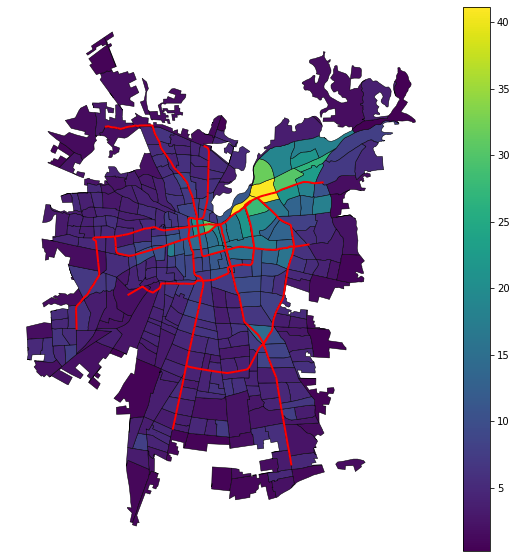

In [19]:
import matplotlib.pyplot as plt
ax = distritos_urbano.plot(figsize = (10,10), column = '1_UF_M2', edgecolor = 'black', linewidth = 0.5,legend = True)
lineas_metro_utm.plot(ax = ax, color = 'red', linewidth = 2)
plt.axis('off')
plt.show()

**¿Qué pasa si nos preguntaran por los distritos que estan a 500 m o menos de las líneas de metro?**

En este caso, lo que necesitamos es un buffer. Un buffer es un contorno poligonal construido alrededor de una geometría. Por lo tanto, si construimos un buffer de un 500m alrededor de la líneas de metro, sabríamos cual es la zona que nos interesa.

<AxesSubplot:>

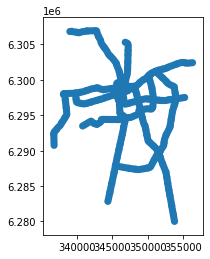

In [20]:
# Generamos el buffer de las líneas de metro
buffer_metro = lineas_metro_utm.copy()
buffer_metro.geometry = buffer_metro.buffer(500)
buffer_metro.plot()

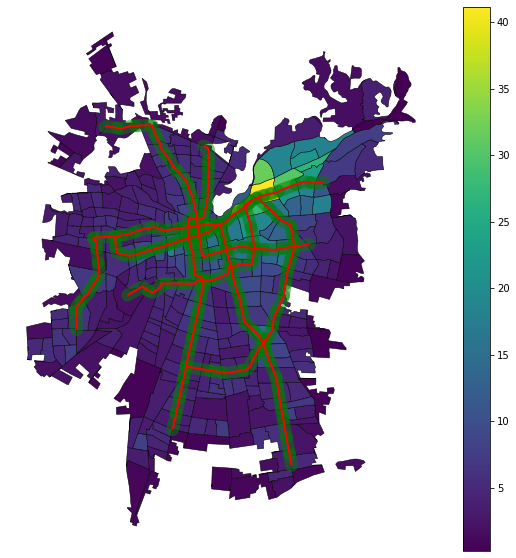

In [21]:
import matplotlib.pyplot as plt
ax = distritos_urbano.plot(figsize = (10,10), column = '1_UF_M2', edgecolor = 'black', linewidth = 0.5,legend = True)
ax1 = buffer_metro.plot(ax=ax, alpha = 0.5, color = 'green')
lineas_metro_utm.plot(ax = ax1, color = 'red', linewidth = 2)
plt.axis('off')
plt.show()

Ahora, para seleccionar los distritos que son parte de esta zona de influencia, vamos a utilizar el método sjoin.

In [22]:
distritos_metro = gpd.sjoin(distritos_urbano, buffer_metro, op='intersects')

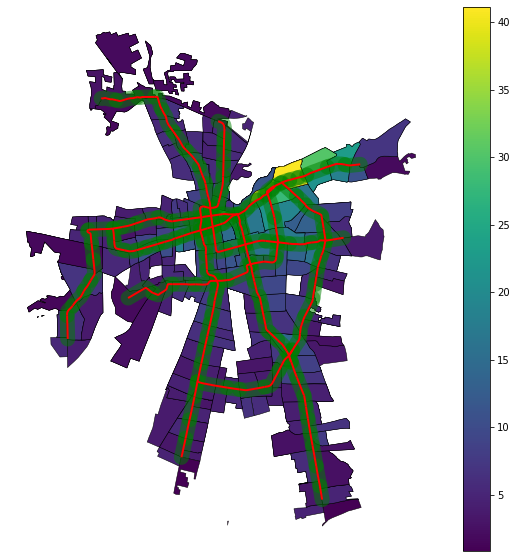

In [23]:
import matplotlib.pyplot as plt
ax = distritos_metro.plot(figsize = (10,10), column = '1_UF_M2', edgecolor = 'black', linewidth = 0.5,legend = True)
ax1 = buffer_metro.plot(ax=ax, alpha = 0.5, color = 'green')
lineas_metro_utm.plot(ax = ax1, color = 'red', linewidth = 2)
plt.axis('off')
plt.show()